<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2002%20%3A%20Machine%20Learning%20and%20Neurons/01_classification_model_breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER CLASSIFICATION**

+ We will be Using the Breast Cancer Dataset from Sklearn Library.
+ 

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


GET THE DATA

In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print("The Keys of the Data :--", data.keys())
print("The Data :--", data.data.shape)
## data is the numpy array of shape 569 samples and 30 features.
print("The Target :--", data.target.shape)
## the target is the labels of the data.
## there are 569 datapoints.
## this is a binary classifier. with class 1 and 0.
print("Classes are :--", data.target_names)
## Classes are :-- ['malignant' 'benign']
## 1 -- Mallignant
## 0 -- Benign.
print("Feature Names are :--", data.feature_names)
## there are 30 feature names.

The Keys of the Data :-- dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The Data :-- (569, 30)
The Target :-- (569,)
Classes are :-- ['malignant' 'benign']
Feature Names are :-- ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


TRAIN TEST SPLIT.

+ Do the train test split the data using train_test_split method.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33, random_state = 42)
print(X_train.shape)  ## tarining data
print(X_test.shape)   ## testing data
print(y_train.shape)  ## tarining labels
print(y_test.shape)   ## testing labels

(381, 30)
(188, 30)
(381,)
(188,)


STANDARDIZE THE MODEL

+ Standardize the training data using StandardScaler


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL DEVELOPMENT

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1]),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


COMPILE THE MODEL

In [18]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)

FIT AND TRAIN THE MODEL

In [19]:
r = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    epochs = 100
)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 0.6716 - accuracy: 0.5958 - val_loss: 0.6402 - val_accuracy: 0.6489
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6060 - accuracy: 0.7008 - val_loss: 0.5771 - val_accuracy: 0.7660
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5524 - accuracy: 0.7454 - val_loss: 0.5226 - val_accuracy: 0.8298
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.7927 - val_loss: 0.4781 - val_accuracy: 0.8511
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.8399 - val_loss: 0.4409 - val_accuracy: 0.8723
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.8583 - val_loss: 0.4092 - val_accuracy: 0.8936
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8845 - val_loss: 0.3822 - val_accuracy: 0.9149
Epoch 8/100


EVALUATE THE MODEL

In [23]:
print("Train Score :--", model.evaluate(X_train, y_train))
print("Test Score :--", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9738
Train Score :-- [0.1000848188996315, 0.9737532734870911]
6/6 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9840
Test Score :-- [0.08293664455413818, 0.9840425252914429]


PLOT THE LOSS AND VALIDATION LOSS and ACCURACY AND VAIDATION ACCURACY

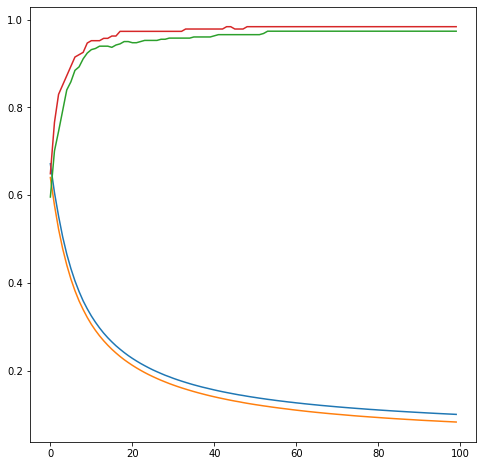

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(r.history["loss"], label = "training loss")
plt.plot(r.history["val_loss"], label = "validation loss")
plt.plot(r.history["accuracy"], label = "training accuracy")
plt.plot(r.history["val_accuracy"], label = "validation accuracy")
plt.legend;

***